# Supervised Learning

based on https://www.datacamp.com/courses/supervised-learning-with-scikit-learn

### **unsupervised learning** : uses unlabelled data

uncovering hidden patterns and structures from unlabelled data

* **clustering** - finding groups in unlabled data
* **Reinforcement learning** - learn how to optimise behaviour given system of rewards and punishments - used for AlphaGo


### **supervised learning** : uses labelled data

We have datapoints described using *predictor variables* (also known as *features* or *independant variables*) and a *target variable* (also known as *response variable* or *dependant variable*)

##### Learning Tasks:
* **Classification** : target variable consists of categories (categorical variable)
* **Regression** : targte variable is continous

Supervised learning is commonly used to either:

* *automate a time-consuming or expensive manual task*
* *make predictions about the future*

## Supervised Learning in Python

libraries for supervised learning in python:
* scikit-learn
* TensorFlow
* keras

### The Irdis dataset

In [24]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
iris = datasets.load_iris()

In [10]:
features = iris.data
target = iris.target

In [18]:
df = pd.DataFrame(features, columns=iris.feature_names)

In [22]:
df[0:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Targets are categorical variables, the species of iris, either  'setosa', 'versicolor' or 'virginica' and are encoded with 0, 1 or 2 respectively.

In [42]:
target[0:3]

array([0, 0, 0])

In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

### Visual EDA (Exploratory Data Analysis)

###### Lets look at the scatter matrix for this data

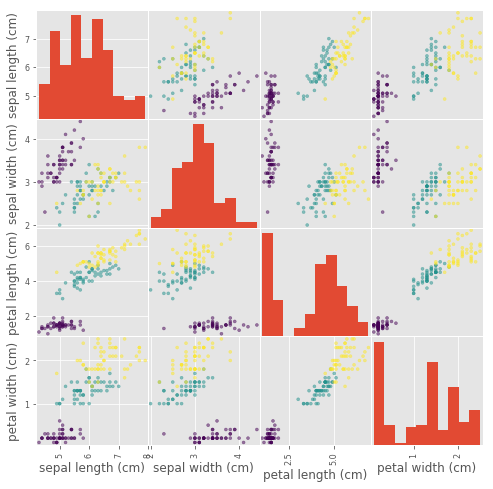

In [26]:
_ = pd.scatter_matrix(df, c=target, figsize=[8, 8])

We can see that petal length and width appear to be correlated and a grouped by species.

### Classifing with KNN

We want to build a *classifier* that takes unlabeled data as input and outputs labeled data.

We'll choose a simple algorithm to classify some data called k-Nearest Neighbours (KNN). The basic idea is to predict the label of any datapoint by looking at the $k$ closest labelled data points and getting them to taking a majority 'vote' on what label the unlabeled point should have.

Basically it creates regions in which a point will be classified as belong to a group. For example for the iris dataset if we trained a KNN classifier using the features petal length and and width we'd find that new points in regions outlined in the image below would be classified with the labels associated with those regions.

![KNN_Decision_boundary_illustration](imgs/KNN_Illustration.png)

### Instantiating a KNN classifier 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=6)

### Training a KNN classifier on labelled data

Pass the KNN classifier the features as a numpy array and the target variable as a numpy array. 

The sklearn api requires the features be a numpy array or pandas data frame that the features are continous as opposed to categorical. It also requires there be no missing data. For pandas dataframes columns must correspond to features and rows to observations/data points.

In [53]:
X = iris['data']
y = iris['target']

In [54]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [55]:
iris['data'].shape

(150, 4)

We have 150 observations with 4 features.

### Predicting on unlabeled data with a KNN classifier 

In [56]:
iris['data'][0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [57]:
iris['target'][0:5]

array([0, 0, 0, 0, 0])

make a new observation / data point

In [58]:
new_data = np.array([[5, 3, 1.35, 0.25]])

Make a prediction of the category of this observation

In [59]:
knn.predict(new_data)

array([0])

It predicts target 0 which corresponds to setosa and is expected since the data we generated is similar to setosa data. 

In [60]:
print(iris['data'][-5:-1])
print(iris['target'][-5:-1])

[[ 6.7  3.   5.2  2.3]
 [ 6.3  2.5  5.   1.9]
 [ 6.5  3.   5.2  2. ]
 [ 6.2  3.4  5.4  2.3]]
[2 2 2 2]


We now look at the data above for virginica irises and generate similar data for the second bit of new data as we do below.

In [61]:
new_data = np.array([[5,   3,  1.35, 0.25],
                     [6.5, 3,   5.0,  2]])

and if we now have the knn classifier predict the species it predicts virginica for the data as we would expect.

In [62]:
knn.predict(new_data)

array([0, 2])

### Measuring Model Performance


We could compute the accuracy of the model by running it on data for which we know the target values.

We could run it on the training data, but it's performance is **NOT** indicative of it's performance on unseen data.

For this reason it is common to split your data into 2 sets, a training set, to train the model, and test set, to test the model accuracy.

Scikit learn provides a function to randomly split your data into a training and testing set.


In [63]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22, stratify=y)

# this splits the data such that 30% is used to testing
# random_state sets a seed so that this split is repeatable

In [115]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [116]:
y_pred = knn.predict(X_test)

In [117]:
y_pred

array([0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0])

Scikit learn has a score function on it's classifier classes which can be used to find the accuracy of the model when run on testing data. This model turns out to be ~95% accurate, which is pretty good for an out-of-the-box model.

In [118]:
accuracy = knn.score(X_test, y_test)
print("accuracy = {:.1f}%".format(accuracy*100))

accuracy = 95.6%


### Model Complexity

The larger the value of $k$, the number of neighbours considered, in the KNN model the less complex the model is, i.e. the decision boundary is smoother. A smaller k leads to a more complex model, meaning a less smooth boundary and this is sensitive to **overfitting**. Overfitting is when the model starts to fit to noise in the specific training data rather than fitting just to general patterns in the data.

Below one can see an image illustrating the decision boundary, with the boundary becoming smoother as more neighbours are considered.

![overfitting](imgs/Overfitting.png)

Equally **underfitting** is bad, where too little complexity is present in the model so it can't accurately describe the decision boundary.

In [122]:
k = range(1, 50)
accuracy_train = []
accuracy_test = []
for n in k:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy_train.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

The below plot is a **model complexity curve** showing the accuracy of the model on the training and test datasets against the complexity of the model.

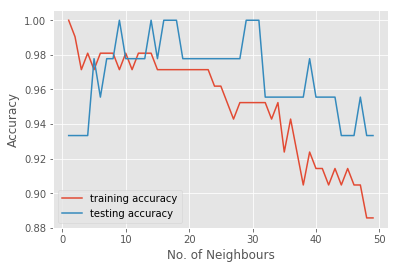

In [126]:
plt.plot(k, accuracy_train, label='training accuracy')
plt.plot(k, accuracy_test, label='testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Neighbours')
plt.legend()

One can see from the above plot that although the accuracy on the training data increases as we increase increase the complexity of the model the accuracy on the testing data has a sweet spot somewhere in the middle. This is because the model is overfitting at high complexity and fitting to the noise in the training dataset, making it very accurate on that particular dataset but less accurate for other data.